# LSA_python Handson Exercise

In [1]:
import nltk

from nltk.corpus import brown

In [2]:
brown.words(categories= 'news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Read the data from the brown corpus, # 
# data = ' '.join(brown.words()[:10000])

In [2]:
# FOR EXAMPLE
TextCorpus= ['Seven continent planet',
            'Five ocean planet',
            'Aisa largest continent',
            'Pacific ocean largest',
            'Ocean saline water']
tokens = [sent.split() for sent in TextCorpus]
tokens

[['Seven', 'continent', 'planet'],
 ['Five', 'ocean', 'planet'],
 ['Aisa', 'largest', 'continent'],
 ['Pacific', 'ocean', 'largest'],
 ['Ocean', 'saline', 'water']]

In [11]:
transformer = TfidfVectorizer()
tfidf = transformer.fit_transform(TextCorpus)

In [12]:
print(tfidf)
# (document number, term number)

  (0, 6)	0.5317722537280788
  (0, 1)	0.5317722537280788
  (0, 8)	0.6591180018251055
  (1, 4)	0.46220770413113277
  (1, 2)	0.6901592662889633
  (1, 6)	0.5568161504458247
  (2, 3)	0.5317722537280788
  (2, 0)	0.6591180018251055
  (2, 1)	0.5317722537280788
  (3, 5)	0.6901592662889633
  (3, 3)	0.5568161504458247
  (3, 4)	0.46220770413113277
  (4, 9)	0.6390704413963749
  (4, 7)	0.6390704413963749
  (4, 4)	0.42799292268317357


In [13]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 3)
lsa = svd.fit_transform(tfidf)

lsa  #  these are the lower dimension representation in numeric form (LSA)

array([[ 5.69995606e-01, -5.21026572e-01, -4.81700519e-01],
       [ 6.29788097e-01,  2.47716942e-01, -5.41216825e-01],
       [ 5.69995606e-01, -5.21026572e-01,  4.81700519e-01],
       [ 6.29788097e-01,  2.47716942e-01,  5.41216825e-01],
       [ 4.08516626e-01,  6.90173499e-01, -6.18144453e-16]])

# Merits and Demerits of LSA
LSA is widely used in processing large sets of documents for various purpose such as document-cluastering and classification 
(in lower dimension space), comparing the similarity between documents (eg. recommending similar books to what a user has liked),finding relations between terms(such as synonym)etc.

The resulting dimension are not interpretable (the physical disadvantage of any matrix factorisation based  technique such PCA).
Also, LSA cannot deal with issues such as ploysemy. For eg. we mentioned "Java" has three senses (coffee name, island name, programming-language), and the representaion
of the term in the lower dimensional space will represent some sort of an 'average meaning' of the term rather than 
three different meanings

# Exploring_ Word2Vec Handson Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import nltk
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [3]:
# CREATING OUR SENTENCES TO TRAIN THE WORD VECTORS    # EXAMPLE
TextCorpus = ['I like Datatrained',
             'Datatrained has a good ML programm',
             'Datatrained has a good faculty',
             'chidri is that good faculty',
             'I like ML']

text_tokens = [sent.split() for sent in TextCorpus]
text_tokens[:2]

[['I', 'like', 'Datatrained'],
 ['Datatrained', 'has', 'a', 'good', 'ML', 'programm']]

In [92]:
# TRAINING THE WORD VECTORS
model_0 = Word2Vec(text_tokens,vector_size= 10, min_count= 1) # default= vector_size=100, min_count=5

In [93]:
model_0.wv.index_to_key, len(model_0.wv)

(['good',
  'Datatrained',
  'faculty',
  'ML',
  'a',
  'has',
  'like',
  'I',
  'that',
  'is',
  'chidri',
  'programm'],
 12)

In [82]:
#model_0.wv.get_vector('like')
#model_0.min_count
model_0.wv.get_normed_vectors().shape

(8, 10)

In [99]:
model_0.wv['ML']

array([-0.07512312, -0.00930133,  0.09539046, -0.07319878, -0.02333996,
       -0.01937929,  0.08078222, -0.05931472,  0.00045167, -0.04754196],
      dtype=float32)

In [55]:
model_0.vector_size

10

In [185]:
wvr = np.zeros((5,6,10), dtype='float32')

r = 1
for i in range(len(text_tokens)):
    for n in range(len(text_tokens[i])) :
        if text_tokens[i][n] in model_0.wv:
            #print(text_tokens[i][n])
            r += 1
            wvr[i][n]= model_0.wv[text_tokens[i][n]]


In [184]:
wvr

array([[[ 0.05454334,  0.08345772, -0.01451886, -0.09209566,
          0.04370099,  0.00571408,  0.07443479, -0.00814436,
         -0.02638405, -0.08753934],
        [-0.01577653,  0.00321372, -0.0414063 , -0.07682689,
         -0.01508008,  0.02469795, -0.00888027,  0.05533662,
         -0.02742977,  0.02260065],
        [ 0.07380505, -0.01533471, -0.04536613,  0.06554051,
         -0.0486016 , -0.01816018,  0.0287658 ,  0.00991874,
         -0.08285215, -0.09448818],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ]],

       [[ 0.07380505, -0.01533471, -0.04536613,  0

In [163]:
vect = np.array(())
for sent in text_tokens[:2]:
    vect.append(np.array([model_0.wv[l] for l in sent if l in model_0.wv ]), axis=0)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [153]:
vect_avg

[array([ 0.03752396,  0.02377891, -0.03376376, -0.03446067, -0.00666023,
         0.00408395,  0.03144011,  0.019037  , -0.04555532, -0.05314229],
       dtype=float32),
 array([-0.03139954, -0.00182172, -0.01398482,  0.01963449, -0.00780174,
        -0.01400574,  0.03511697,  0.02398652, -0.02601844,  0.00017243],
       dtype=float32)]

In [105]:
model_0.wv[text_tokens[0][2]]

array([ 0.07380505, -0.01533471, -0.04536613,  0.06554051, -0.0486016 ,
       -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448818],
      dtype=float32)

In [ ]:
**************

In [93]:
model_0.wv['ML']  # model.wv['ML','Datatrained']

array([ 0.03113786,  0.05770715, -0.05098698,  0.02809874, -0.02585673,
        0.00515335,  0.05311637, -0.0278886 ,  0.02823438, -0.0424185 ,
       -0.02217805,  0.05874068, -0.00986033,  0.00200857, -0.02587894,
       -0.0480168 ], dtype=float32)

In [18]:
#np.zeros(model_0.wv['ML','I','like'].shape)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [94]:
# SIMILARITY BETWEEN WORD VECTORS IS MEASURES USING COSINE SIMILARITY

model_0.wv.most_similar('faculty',topn=5)

[('Datatrained', 0.06734082847833633),
 ('has', -0.1342252492904663),
 ('I', -0.18593712151050568),
 ('good', -0.20494458079338074),
 ('ML', -0.26229214668273926)]

# Exploring_ Word2Vec Part 2

In [ ]:
# TRAINING our WORD VECTORS on the TEXT8 CORPUS
# Cleaned wikipedia text, compressed to 100MB

# importing raw text file

In [84]:
sentences = word2vec.Text8Corpus('./text8')

In [85]:
type(sentences)

gensim.models.word2vec.Text8Corpus

In [90]:
# Using all default parameters
model= Word2Vec(sentences,vector_size=56,min_count=4)

In [101]:
model.wv.most_similar('happiness', topn=6)

[('humanity', 0.8291695713996887),
 ('pleasure', 0.8011971116065979),
 ('fear', 0.7925096750259399),
 ('desires', 0.774017870426178),
 ('goodness', 0.7682574987411499),
 ('dignity', 0.7634167671203613)]

In [102]:
model.wv.most_similar('queen',topn=5)

[('prince', 0.7891899347305298),
 ('princess', 0.7794641852378845),
 ('king', 0.7665117979049683),
 ('elizabeth', 0.7593103051185608),
 ('consort', 0.7174058556556702)]

In [104]:
model.wv.most_similar(positive=['woman','king'], negative=['man'], topn=5)

[('empress', 0.7260298728942871),
 ('son', 0.7250191569328308),
 ('emperor', 0.7248682975769043),
 ('queen', 0.7008768916130066),
 ('prince', 0.6997836828231812)]

In [105]:
model.wv.most_similar(positive=['woman','hero'], negative=['man'], topn=5)

[('heroine', 0.7601175308227539),
 ('narrator', 0.693372368812561),
 ('protagonist', 0.6735948324203491),
 ('villain', 0.672890841960907),
 ('idol', 0.6632981896400452)]

In [129]:
# Visualizing these words vectors

X = model.wv[model.wv.index_to_key]

In [140]:
# we will use PCA to reduce and visualize in 2 dimensions

from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
result = pca.fit_transform(X)

In [145]:
# Randomly select 100 words
import random
#random.seed(22)

ind = random.sample(range(0, len(X)), 100)
result_random = result[ind]
all_words = list(model.wv.index_to_key)
words = [all_words[i] for i in ind]

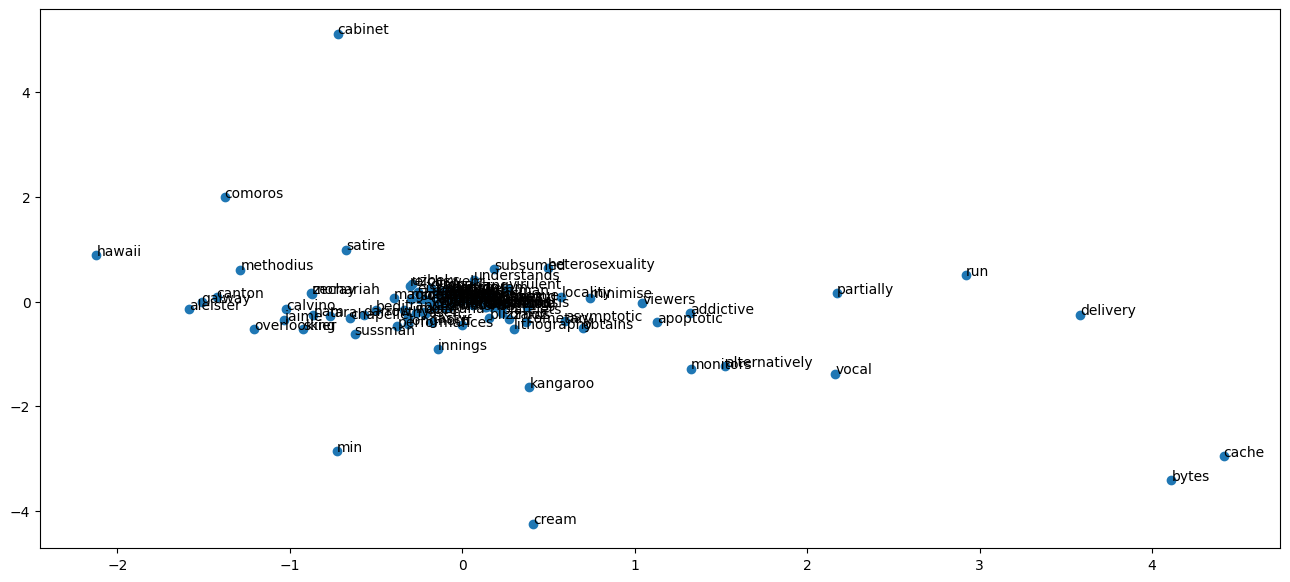

In [146]:
plt.figure(figsize=(16,7))
plt.scatter(result_random[:,0], result_random[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

In [159]:
words = list(model.wv.index_to_key)
words[220:228]

['small', 'following', 'within', 'non', 'left', 'human', 'main', 'among']

# Exploring_ Word2Vec Part 3

In [160]:
from nltk.corpus import brown, movie_reviews

In [163]:
model_brown = Word2Vec(brown.sents(), sg=1, vector_size=56)  # sg= skipgram
model_movie = Word2Vec(movie_reviews.sents(), sg= 1, vector_size= 56, window= 4)

In [167]:
print(model.wv.most_similar('money', topn=5))

[('profits', 0.7772126197814941), ('buying', 0.7464767694473267), ('payment', 0.74095219373703), ('payments', 0.720259428024292), ('cash', 0.7201445698738098)]


In [168]:
print(model_brown.wv.most_similar('money', topn=5))

[('job', 0.8569725155830383), ('care', 0.8484736680984497), ('risk', 0.8251261115074158), ('friendship', 0.8236513733863831), ('joy', 0.8170315623283386)]


In [169]:
print(model_movie.wv.most_similar('money', topn=5))

[('cash', 0.7731497287750244), ('risk', 0.7549981474876404), ('food', 0.7480956315994263), ('paying', 0.7387651205062866), ('ransom', 0.7269435524940491)]


In [ ]:
# these all models shown different result of most_similar word on same word

# EXAMPLE

In [155]:
#import random
#random.choice(model.wv.index_to_key)
len(model.wv.index_to_key)
#model.wv.index_to_key

82296

In [114]:

# model.wv.key_to_index
# model.wv.index_to_key
vocab_len = len(model.wv)  # get a vocabulary size
vocab_len

82296

In [126]:
model.wv.get_vecattr('national','count')

8904

In [ ]:
rock_idx = model.wv.vocab["rock"].index  # 🚫
rock_cnt = model.wv.vocab["rock"].count  # 🚫
vocab_len = len(model.wv.vocab)  # 🚫

rock_idx = model.wv.key_to_index["rock"]   # 👍
rock_cnt = model.wv.get_vecattr("rock", "count")  # 👍
vocab_len = len(model.wv)  # 👍


In [ ]:
#L2-normalized vectors are now computed dynamically, on request. The full numpy array of "normalized vectors" is no longer
# stored in memory
all_normed_vectors = model.wv.get_normed_vectors()  # still works but now creates a new array on each call!
normed_vector = model.wv.vectors_norm[model.wv.vocab["rock"].index]  # 🚫
normed_vector = model.wv.get_vector("rock", norm=True)  # 👍

In [ ]:
# 7. methods like most_similar(), wmdistance(), doesnt_match(), similarity(), & others moved to KeyedVectors
# These methods moved from the full model (Word2Vec, Doc2Vec, FastText) object to its .wv subcomponent
# (of type KeyedVectors) many releases ago:

w2v_model.most_similar(word)  # 🚫
w2v_model.most_similar_cosmul(word)  # 🚫
w2v_model.wmdistance(wordlistA, wordlistB)  # 🚫
w2v_model.similar_by_word(word)  # 🚫
w2v_model.similar_by_vector(word)  # 🚫
w2v_model.doesnt_match(wordlist)  # 🚫
w2v_model.similarity(wordA, wordB)  # 🚫
w2v_model.n_similarity(wordlistA, wordlistB)  # 🚫
w2v_model.evaluate_word_pairs(wordpairs)  # 🚫
w2v_model.accuracy(questions)  # 🚫
w2v_model.log_accuracy(section)  # 🚫

w2v_model.wv.most_similar(word)  # 👍
w2v_model.wv.most_similar_cosmul(word)  # 👍
w2v_model.wv.wmdistance(wordlistA, wordlistB)  # 👍
w2v_model.wv.similar_by_word(word)  # 👍
w2v_model.wv.similar_by_vector(word)  # 👍
w2v_model.wv.doesnt_match(wordlist)  # 👍
w2v_model.wv.similarity(wordA, wordB)  # 👍
w2v_model.wv.n_similarity(wordlistA, wordlistB)  # 👍
w2v_model.wv.evaluate_word_pairs(wordpairs)  # 👍
w2v_model.wv.evaluate_word_analogies(questions)  # 👍
w2v_model.wv.log_accuracy(section)  # 👍

In [1]:
import wget

In [82]:
url= "http://mattmahoney.net/dc/text8.zip"
file = wget.download(url)

100% [........................................................................] 31344016 / 31344016

In [4]:
#url= "https://nlp.stanford.edu/projects/glove/glove.6B.zip"
#file = wget.download(url)
#url = 'https://raw.githubusercontent.com/Cynwell/Text-Level-GNN/main/r52-train-all-terms.txt'  # download
#url = 'https://raw.githubusercontent.com/Cynwell/Text-Level-GNN/main/r8-train-all-terms.txt'  # download
url = 'https://raw.githubusercontent.com/Cynwell/Text-Level-GNN/main/r8-test-all-terms.txt'
file = wget.download(url)

 63% [..............................................                            ]  753664 / 1195261

100% [..........................................................................] 1195261 / 1195261

In [171]:
import zipfile   # UN
zip_ref = zipfile.ZipFile(file, "r")
zip_ref.extractall()
zip_ref.close()